In [20]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import config as cf
import tweepy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tqdm as tqdm

In [2]:
column_names = ['created_at', 'text', 'favorite_count', 'retweet_count', 'id', 'screen_name', 'name', 'followers_count', 'friends_count', 'verified']
df = pd.read_csv('CryptoCommunity_twitter_1602_2202.csv', names=column_names, parse_dates=['created_at'])
df = df.drop_duplicates()
df = df.dropna()

In [3]:
index_of_max = df[column_names[7]].idxmax()
print('highest followers - @',df[column_names[5]][index_of_max], ' - uptil ', df[column_names[0]][index_of_max])

highest followers - @ Reuters  - uptil  2023-02-16 02:20:00


In [4]:
def distinct_screen_names(df):
    distinct_names = [df.iloc[0]['screen_name']]
    indices = [0]
    # Iterate through the dataframe and compare the current and previous 'screen_name' values
    for i in range(1, len(df)):
        current_name = df.iloc[i]['screen_name']
        previous_name = df.iloc[i-1]['screen_name']
        if current_name != previous_name:
            distinct_names.append(current_name)
            indices.append(i)
    # Create a dataframe from the lists of distinct names and indices
    data = {'screen_name': distinct_names, 'index': indices}
    df_out = pd.DataFrame(data)
    return df_out


In [21]:
def count_occurance(screen_name, dataframe):
    count = dataframe['screen_name'].str.count(screen_name).sum()
    # print(count)
    return count

In [16]:
occurance = count_occurance('Reuters')
print(occurance)

51


In [9]:
distinct_df = distinct_screen_names(df)
distinct_df.head()

,screen_name,index
0,Reuters,0
1,WSJ,24
2,business,26
3,citizentvkenya,32
4,MarketWatch,33


In [24]:
followers_counts = df.loc[distinct_df['index'], 'followers_count'].tolist()  # unflattened
 [:10]

[25754845,
 20500431,
 9183288,
 5091380,
 4468724,
 4326649,
 4221495,
 3989617,
 3722348,
 3490481]

In [22]:
occurance_range=[]

for name in distinct_df['screen_name']:
    occurance=count_occurance(name, df)
    occurance_range.append(occurance)

print(occurance_range)

[51, 6, 11, 1, 1, 8, 2, 2, 1, 2, 8, 2, 1, 10, 1, 8, 1, 4, 4, 1, 1, 1, 1, 15, 69, 1, 1, 4, 1, 2, 1, 8, 1, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 5, 1, 1, 7, 5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 7, 1, 2, 11, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 14, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 6, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 14, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 3, 1, 1, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 4, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 8, 1, 1, 1, 2, 1, 5, 1, 1

C:\Users\prikarsys\AppData\Local\Temp\ipykernel_12432\3145421048.py:16: RuntimeWarning: divide by zero encountered in log10
  m, b = np.polyfit(np.log10(occurance_range), np.log10(followers_counts), 1)


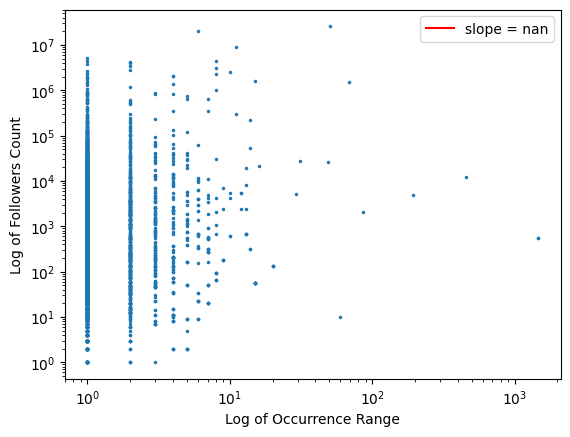

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the data to numpy arrays
followers_counts = np.array(followers_counts)
occurance_range = np.array(occurance_range)

# Create a log-log plot
plt.loglog(occurance_range, followers_counts, '.', markersize=3)

# Add labels to the x and y axes
plt.xlabel('Log of Occurrence Range')
plt.ylabel('Log of Followers Count')

# Calculate the linear fit
m, b = np.polyfit(np.log10(occurance_range), np.log10(followers_counts), 1)

# Create the line for the linear fit
x_vals = np.logspace(np.log10(occurance_range[0]), np.log10(occurance_range[-1]), 100)
y_vals = 10**(m*np.log10(x_vals) + b)

# Add the linear fit to the plot
plt.plot(x_vals, y_vals, 'r-', label=f'slope = {m:.2f}')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


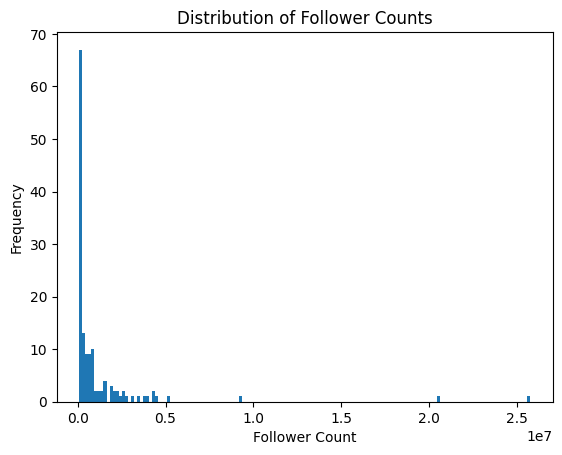

In [29]:
follower_counts = followers_counts[:140]
usernames = distinct_df['screen_name'][:140]
plt.hist(follower_counts, bins=150)
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Counts')
plt.show()

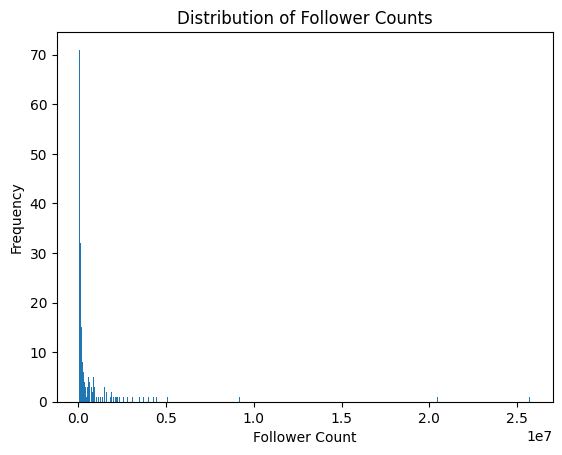

In [30]:
follower_counts = followers_counts[:200]
usernames = distinct_df['screen_name'][:200]
plt.hist(follower_counts, bins=500)
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Counts')
plt.show()

In [33]:
follower_countsss = follower_counts.tolist()

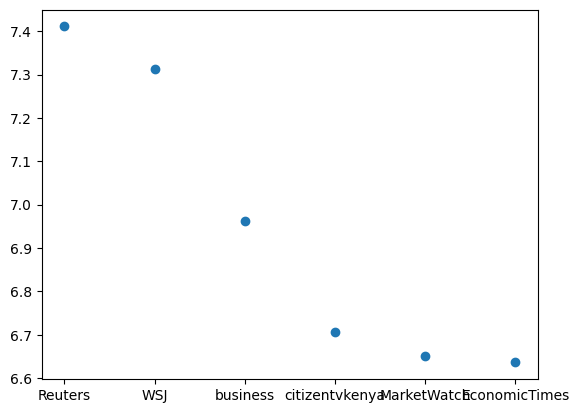

In [48]:
# Take the first 200 values of the follower_counts
follower_counts = followers_counts[:6]
usernames = distinct_df['screen_name'][:6]

# Calculate the logarithm of the follower_counts and usernames
log_follower_counts = np.log10(follower_counts)
log_usernames = usernames

# Create a scatter plot of the logarithm of the values
plt.scatter(log_usernames, log_follower_counts)

# Add labels to the x and y axes
# plt.xlabel('Log of usernames')
# plt.ylabel('Log of follower counts')

# Show the plot
plt.show()

In [40]:
def show_distribution(max_num):
    if max_num != -1:
        follower_counts = followers_counts[:max_num]
        usernames = distinct_df['screen_name'][:max_num]
        log_follower_counts = np.log10(follower_counts)
        plt.scatter(usernames, log_follower_counts)
        plt.xticks(rotation=90, fontsize=5)
        plt.xlabel('Usernames')
        plt.ylabel('Log of Follower_Counts')
        plt.show()
    else:
        follower_counts = followers_counts
        usernames = distinct_df['screen_name']
        log_follower_counts = np.log10(follower_counts)
        plt.scatter(usernames, log_follower_counts)
        plt.xticks(rotation=90, fontsize=5)
        plt.xlabel('Usernames')
        plt.ylabel('Log of Follower_Counts')
        plt.show()


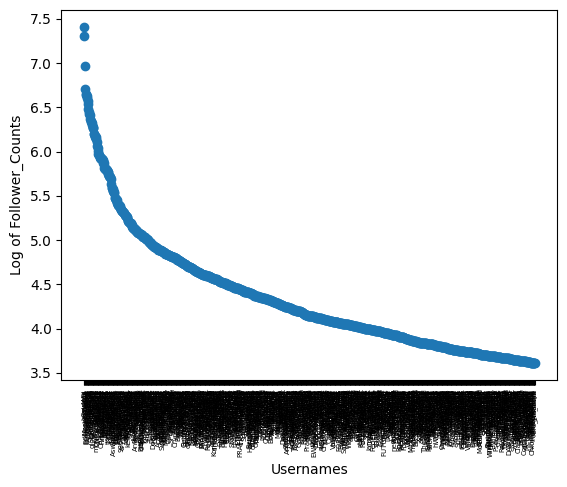

In [50]:
show_distribution(1000)

TypeError: expected x and y to have same length

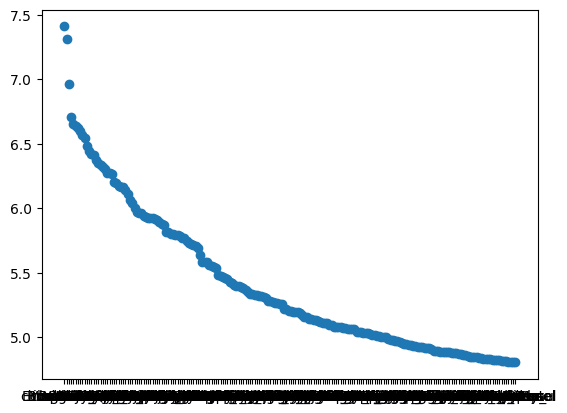

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Take the first max_num values of the follower_counts and usernames
max_num = 200
follower_counts = followers_counts[:max_num]
usernames = distinct_df['screen_name'][:max_num]

# Calculate the logarithm of the follower_counts
log_follower_counts = np.log10(follower_counts)

# Create a scatter plot of the logarithm of the values
plt.scatter(usernames, log_follower_counts)

# Add a linear fit to the scatter plot
z = np.polyfit(usernames, log_follower_counts, 1)
p = np.poly1d(z)
plt.plot(usernames, p(usernames), "r--")

# Rotate and shrink the x-axis labels
plt.xticks(rotation=90, fontsize=5)

# Add labels to the x and y axes
plt.xlabel('Usernames')
plt.ylabel('Log of Follower Counts')

# Print the slope of the linear fit
slope = z[0]
print("Slope of linear fit:", slope)

# Show the plot
plt.show()

Slope of linear fit: -0.01601482346256714


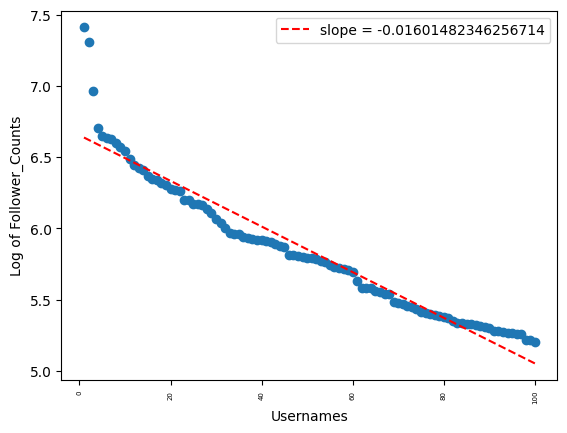

In [64]:

max_num = 100
follower_counts = followers_counts[:max_num]
usernames = distinct_df['screen_name'][:max_num]
log_follower_counts = np.log10(follower_counts)

# # Convert the list of usernames to an array of numbers
# username_dict = {name: i for i, name in enumerate(set(usernames))}
# username_nums = np.array([username_dict[name] for name in usernames])


count_list = [df['screen_name'].tolist().count(username) for username in usernames]
username_nums = count_list

# Create a scatter plot of the logarithm of the values

def generate_list(N):
    return [i for i in range(1, N+1)]

indices = generate_list(max_num)

plt.scatter(indices, log_follower_counts)

# plt.scatter(usernames, log_follower_counts)

# Add labels to the x and y axes
plt.xticks(rotation=90, fontsize=5)
plt.xlabel('Usernames')
plt.ylabel('Log of Follower_Counts')

# Add a linear fit to the scatter plot
z = np.polyfit(indices, log_follower_counts, 1)
p = np.poly1d(z)
slope = z[0]
print("Slope of linear fit:", slope)
plt.plot(indices, p(indices), "r--", label=f'slope = {slope}')

# Determine the slope of the linear fit
plt.legend()

# Show the plot
plt.show()

In [ ]:
from fractions import Fraction

def nearest_rational(x):
    # Set maximum denominator to 10^6 to avoid long fractions
    max_denominator = 10**6
    
    # Use the built-in Fraction class to convert the float to a rational number
    frac = Fraction(x).limit_denominator(max_denominator)
    
    # Return the numerator and denominator as a tuple of integers
    return (frac.numerator, frac.denominator)


In [101]:
def show_distribution_01(max_num,distinct_df):
    if max_num != -1 :
        follower_counts = followers_counts[:max_num]
        usernames = distinct_df['screen_name'][:max_num]
        log_follower_counts = np.log10(follower_counts)

        count_list = [df['screen_name'].tolist().count(username) for username in usernames]
        username_nums = count_list

        def generate_list(N):
            return [i for i in range(1, N+1)]

        indices = generate_list(max_num)

        plt.scatter(indices, log_follower_counts, marker='o', s=1, c='b')
        plt.xticks(rotation=90, fontsize=5)
        plt.xlabel('Usernames')
        plt.ylabel('Log of Follower_Counts')

        z = np.polyfit(indices, log_follower_counts, 1)
        p = np.poly1d(z)
        slope = z[0]
        print("Slope of linear fit:", slope)
        plt.plot(indices, p(indices), "r--", label=f'slope = {slope}')

        plt.legend()

        # Show the plot
        plt.show()
    else:
        follower_counts = followers_counts
        usernames = distinct_df['screen_name']
        log_follower_counts = np.log10(follower_counts)

        count_list = [df['screen_name'].tolist().count(username) for username in usernames]
        username_nums = count_list

        def generate_list(N):
            return [i for i in range(1, N+1)]

        indices = generate_list(len(usernames))

        plt.scatter(indices, log_follower_counts, marker='o', s=1, c='b')
        plt.xticks(rotation=90, fontsize=5)
        plt.xlabel('Usernames')
        plt.ylabel('Log of Follower_Counts')

        z = np.polyfit(indices, log_follower_counts, 1)
        p = np.poly1d(z)
        slope = z[0]
        print("Slope of linear fit:", slope)
        plt.plot(indices, p(indices), "r--", label=f'slope = {slope}')

        plt.legend()

        # Show the plot
        plt.show()

Slope of linear fit: -0.0008344631668944952


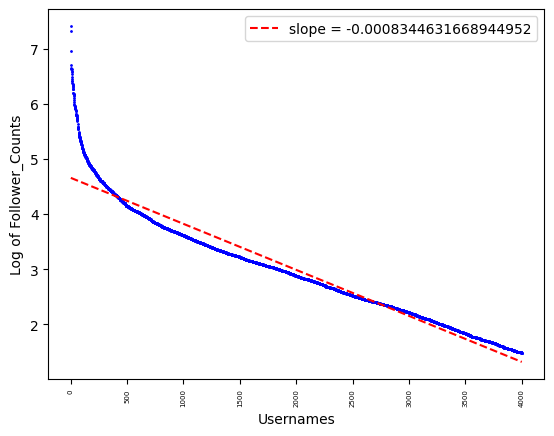

In [99]:
show_distribution_01(4000,distinct_df)

Slope of linear fit: -0.0015636162297905055


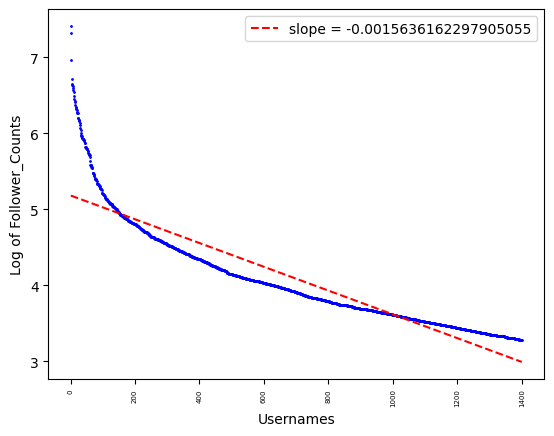

In [95]:
show_distribution_01(1400,distinct_df)

C:\Users\prikarsys\AppData\Local\Temp\ipykernel_12432\1640257337.py:33: RuntimeWarning: divide by zero encountered in log10
  log_follower_counts = np.log10(follower_counts)


Slope of linear fit: nan


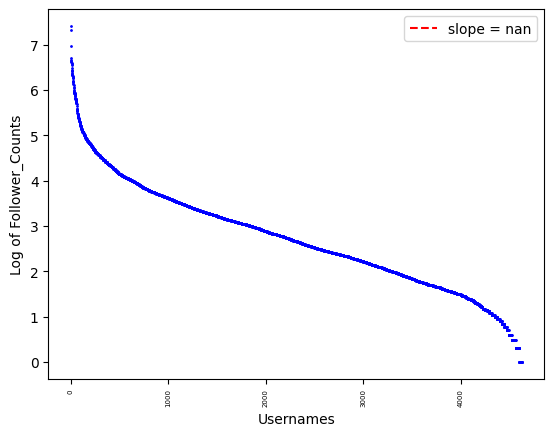

In [104]:
show_distribution_01(-1,distinct_df)

In [96]:
def plot_multiple_ranges(distinct_df, followers_counts, N):
    max_num = len(distinct_df)
    step_size = max_num // 20
    
    for i in range(1, 21):
        # Calculate the range for this plot
        range_max = i * N
        range_min = 0
        
        # Only plot if the range is within the maximum number of usernames
        if range_max <= max_num:
            # Slice the data to the desired range
            slice_df = distinct_df.iloc[range_min:range_max]
            slice_followers = followers_counts[range_min:range_max]
            slice_max_num = len(slice_df)
            
            # Create the plot using the show_distribution_01 function
            plt.figure(figsize=(8, 6))
            show_distribution_01(slice_max_num, slice_followers)
            plt.title(f'Range: [0,{range_max}]')
            plt.show()